In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
purple_color=(147/255,103/255,153/255)

In [3]:
def draw_plot(train_data,title):
    with open(train_data, 'rb') as f:
        data = pickle.load(f)
        total_rewards = data['total_rewards']
        final_rewards = data['final_rewards']
        if title=="Adaptive Baseline":
            moving_average_rewards = data['average_rewards']
        else:
            moving_average_rewards = data['moving_average_rewards']
    plt.figure(figsize=(8,8))

    plt.title(title + " Training Result")
    plt.plot(total_rewards, label='Total Rewards',color='xkcd:sky blue')
    plt.plot(moving_average_rewards, color=purple_color, label='Average Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    if title=="Adaptive Baseline":
        plt.ylim(-800, 300)
    else:
        plt.ylim(-400, 400)
    plt.legend()
    plt.show()

Remeber to assign the correct value to N

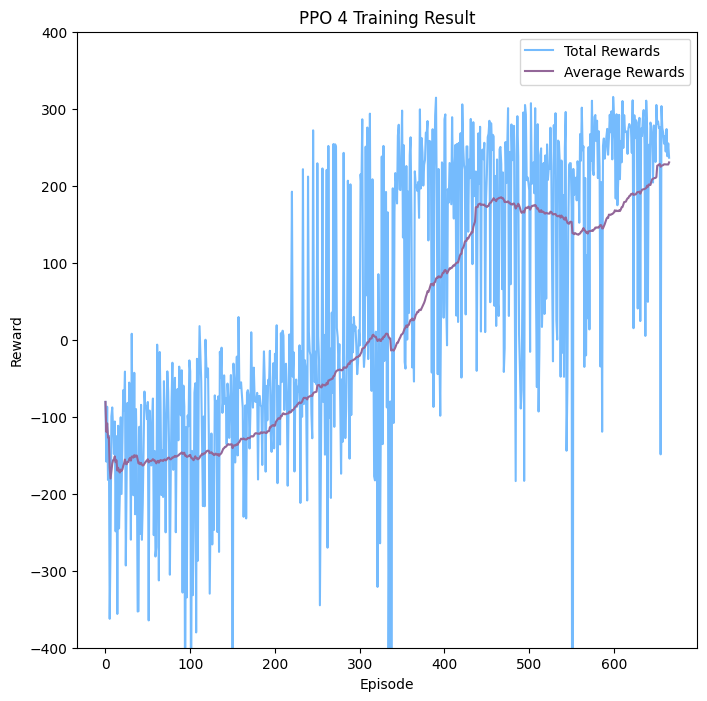

In [12]:
N = 4
draw_plot(f'./results/PPO_Result_{N}.pkl', f'PPO {N}')

<Axes: ylabel='Density'>

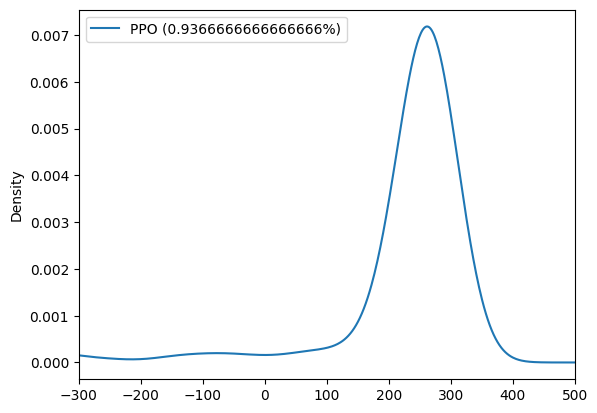

In [11]:
plt.xlim([-300, 500])  # Set the range of the x-axis

with open(f'./results/PPO_Result_{N}.pkl', 'rb') as f:
    data = pickle.load(f)
test_total_rewards = data['test_total_rewards']
test_final_rewards = data['test_final_rewards']
total_rewards = pd.Series(test_total_rewards, name="Total Rewards")
success_rate = data['success_rate']
total_rewards.plot(kind="kde", label=f"PPO ({success_rate}%)",legend=True)